In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, fbeta_score, recall_score
from sklearn.svm import SVC

lulc = pd.read_csv("lulc2013-2020.ascii",delim_whitespace=" ",header=None)
NDVI = pd.read_csv("ndvi2013-2020.ascii",delim_whitespace=" ",header=None)
RD = pd.read_csv("road2013-2020.ascii",delim_whitespace=" ",header=None)
NTL = pd.read_csv("light2013-2020.ascii",delim_whitespace=" ",header=None)
NLST = pd.read_csv("NLST_WinterHalf_13to20.txt",delim_whitespace=" ",header=None)

features = ['LAT', 'LON', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

lulc.columns=features
NDVI.columns=features
RD.columns=features
NTL.columns=features
NLST.columns=features

label = [0] * 26458

NDVI['LABEL2013'] = label
NDVI['LABEL2014'] = label
NDVI['LABEL2015'] = label
NDVI['LABEL2016'] = label
NDVI['LABEL2017'] = label
NDVI['LABEL2018'] = label
NDVI['LABEL2019'] = label
NDVI['LABEL2020'] = label

NTL['LABEL2013'] = label
NTL['LABEL2014'] = label
NTL['LABEL2015'] = label
NTL['LABEL2016'] = label
NTL['LABEL2017'] = label
NTL['LABEL2018'] = label
NTL['LABEL2019'] = label
NTL['LABEL2020'] = label

RD['LABEL2013'] = label
RD['LABEL2014'] = label
RD['LABEL2015'] = label
RD['LABEL2016'] = label
RD['LABEL2017'] = label
RD['LABEL2018'] = label
RD['LABEL2019'] = label
RD['LABEL2020'] = label

NLST['LABEL2013'] = label
NLST['LABEL2014'] = label
NLST['LABEL2015'] = label
NLST['LABEL2016'] = label
NLST['LABEL2017'] = label
NLST['LABEL2018'] = label
NLST['LABEL2019'] = label
NLST['LABEL2020'] = label

lulc5class = lulc[['LAT', 'LON']].copy()
lulc5class['2013'] = label
lulc5class['2014'] = label
lulc5class['2015'] = label
lulc5class['2016'] = label
lulc5class['2017'] = label
lulc5class['2018'] = label
lulc5class['2019'] = label
lulc5class['2020'] = label


for i in range(26458):
    for year in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
        value = lulc[year].loc[i]
        if value in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
            lulc5class[year].loc[i] = 1
        elif value == 10:
            lulc5class[year].loc[i] = 2
        elif value in [11, 15, 17]:
            lulc5class[year].loc[i] = 3
            NDVI['LABEL'+year].loc[i] = 1
            NTL['LABEL'+year].loc[i] = 1
            RD['LABEL'+year].loc[i] = 1
            NLST['LABEL'+year].loc[i] = 1
        elif value == 12 or value == 14:
            lulc5class[year].loc[i] = 4
        elif value == 13:
            lulc5class[year].loc[i] = 5
            NDVI['LABEL'+year].loc[i] = 4
            NTL['LABEL'+year].loc[i] = 4
            RD['LABEL'+year].loc[i] = 4
            NLST['LABEL'+year].loc[i] = 4
        elif value == 16:
            lulc5class[year].loc[i] = 6

NDVI_2013 = NDVI[['LAT','LON','2013','LABEL2013']].copy() 
RD_2013 = RD[['LAT','LON','2013','LABEL2013']].copy() 
NTL_2013 = NTL[['LAT','LON','2013','LABEL2013']].copy() 
NLST_2013 = NLST[['LAT','LON','2013','LABEL2013']].copy() 
NDVI_2013_Urban = NDVI_2013[(NDVI_2013['LABEL2013'] == 4)]
RD_2013_Urban = RD_2013[(RD_2013['LABEL2013'] == 4)]
NTL_2013_Urban = NTL_2013[(NTL_2013['LABEL2013'] == 4)]
NLST_2013_Urban = NLST_2013[(NLST_2013['LABEL2013'] == 4)]
NDVI_2013_Water = NDVI_2013[(NDVI_2013['LABEL2013'] == 1)]
RD_2013_Water = RD_2013[(RD_2013['LABEL2013'] == 1)]
NTL_2013_Water = NTL_2013[(NTL_2013['LABEL2013'] == 1)]
NLST_2013_Water = NLST_2013[(NLST_2013['LABEL2013'] == 1)]
NDVI_2013_NotUrban = NDVI_2013[(NDVI_2013['LABEL2013'] != 4)]
RD_2013_NotUrban = RD_2013[(RD_2013['LABEL2013'] != 4)]
NTL_2013_NotUrban = NTL_2013[(NTL_2013['LABEL2013'] != 4)]
NLST_2013_NotUrban = NLST_2013[(NLST_2013['LABEL2013'] != 4)]
NDVI_2013_NotUrbanNotWater = NDVI_2013_NotUrban[(NDVI_2013_NotUrban['LABEL2013'] != 1)]
RD_2013_NotUrbanNotWater = RD_2013_NotUrban[(RD_2013_NotUrban['LABEL2013'] != 1)]
NTL_2013_NotUrbanNotWater = NTL_2013_NotUrban[(NTL_2013_NotUrban['LABEL2013'] != 1)]
NLST_2013_NotUrbanNotWater = NLST_2013_NotUrban[(NLST_2013_NotUrban['LABEL2013'] != 1)]

NDVI_2014 = NDVI[['LAT','LON','2014','LABEL2014']].copy() 
RD_2014 = RD[['LAT','LON','2014','LABEL2014']].copy() 
NTL_2014 = NTL[['LAT','LON','2014','LABEL2014']].copy() 
NLST_2014 = NLST[['LAT','LON','2014','LABEL2014']].copy() 
NDVI_2014_Urban = NDVI_2014[(NDVI_2014['LABEL2014'] == 4)]
RD_2014_Urban = RD_2014[(RD_2014['LABEL2014'] == 4)]
NTL_2014_Urban = NTL_2014[(NTL_2014['LABEL2014'] == 4)]
NLST_2014_Urban = NLST_2014[(NLST_2014['LABEL2014'] == 4)]
NDVI_2014_Water = NDVI_2014[(NDVI_2014['LABEL2014'] == 1)]
RD_2014_Water = RD_2014[(RD_2014['LABEL2014'] == 1)]
NTL_2014_Water = NTL_2014[(NTL_2014['LABEL2014'] == 1)]
NLST_2014_Water = NLST_2014[(NLST_2014['LABEL2014'] == 1)]
NDVI_2014_NotUrban = NDVI_2014[(NDVI_2014['LABEL2014'] != 4)]
RD_2014_NotUrban = RD_2014[(RD_2014['LABEL2014'] != 4)]
NTL_2014_NotUrban = NTL_2014[(NTL_2014['LABEL2014'] != 4)]
NLST_2014_NotUrban = NLST_2014[(NLST_2014['LABEL2014'] != 4)]
NDVI_2014_NotUrbanNotWater = NDVI_2014_NotUrban[(NDVI_2014_NotUrban['LABEL2014'] != 1)]
RD_2014_NotUrbanNotWater = RD_2014_NotUrban[(RD_2014_NotUrban['LABEL2014'] != 1)]
NTL_2014_NotUrbanNotWater = NTL_2014_NotUrban[(NTL_2014_NotUrban['LABEL2014'] != 1)]
NLST_2014_NotUrbanNotWater = NLST_2014_NotUrban[(NLST_2014_NotUrban['LABEL2014'] != 1)]

NDVI_2015 = NDVI[['LAT','LON','2015','LABEL2015']].copy() 
RD_2015 = RD[['LAT','LON','2015','LABEL2015']].copy() 
NTL_2015 = NTL[['LAT','LON','2015','LABEL2015']].copy() 
NLST_2015 = NLST[['LAT','LON','2015','LABEL2015']].copy() 
NDVI_2015_Urban = NDVI_2015[(NDVI_2015['LABEL2015'] == 4)]
RD_2015_Urban = RD_2015[(RD_2015['LABEL2015'] == 4)]
NTL_2015_Urban = NTL_2015[(NTL_2015['LABEL2015'] == 4)]
NLST_2015_Urban = NLST_2015[(NLST_2015['LABEL2015'] == 4)]
NDVI_2015_Water = NDVI_2015[(NDVI_2015['LABEL2015'] == 1)]
RD_2015_Water = RD_2015[(RD_2015['LABEL2015'] == 1)]
NTL_2015_Water = NTL_2015[(NTL_2015['LABEL2015'] == 1)]
NLST_2015_Water = NLST_2015[(NLST_2015['LABEL2015'] == 1)]
NDVI_2015_NotUrban = NDVI_2015[(NDVI_2015['LABEL2015'] != 4)]
RD_2015_NotUrban = RD_2015[(RD_2015['LABEL2015'] != 4)]
NTL_2015_NotUrban = NTL_2015[(NTL_2015['LABEL2015'] != 4)]
NLST_2015_NotUrban = NLST_2015[(NLST_2015['LABEL2015'] != 4)]
NDVI_2015_NotUrbanNotWater = NDVI_2015_NotUrban[(NDVI_2015_NotUrban['LABEL2015'] != 1)]
RD_2015_NotUrbanNotWater = RD_2015_NotUrban[(RD_2015_NotUrban['LABEL2015'] != 1)]
NTL_2015_NotUrbanNotWater = NTL_2015_NotUrban[(NTL_2015_NotUrban['LABEL2015'] != 1)]
NLST_2015_NotUrbanNotWater = NLST_2015_NotUrban[(NLST_2015_NotUrban['LABEL2015'] != 1)]

NDVI_2016 = NDVI[['LAT','LON','2016','LABEL2016']].copy() 
RD_2016 = RD[['LAT','LON','2016','LABEL2016']].copy() 
NTL_2016 = NTL[['LAT','LON','2016','LABEL2016']].copy() 
NLST_2016 = NLST[['LAT','LON','2016','LABEL2016']].copy() 
NDVI_2016_Urban = NDVI_2016[(NDVI_2016['LABEL2016'] == 4)]
RD_2016_Urban = RD_2016[(RD_2016['LABEL2016'] == 4)]
NTL_2016_Urban = NTL_2016[(NTL_2016['LABEL2016'] == 4)]
NLST_2016_Urban = NLST_2016[(NLST_2016['LABEL2016'] == 4)]
NDVI_2016_Water = NDVI_2016[(NDVI_2016['LABEL2016'] == 1)]
RD_2016_Water = RD_2016[(RD_2016['LABEL2016'] == 1)]
NTL_2016_Water = NTL_2016[(NTL_2016['LABEL2016'] == 1)]
NLST_2016_Water = NLST_2016[(NLST_2016['LABEL2016'] == 1)]
NDVI_2016_NotUrban = NDVI_2016[(NDVI_2016['LABEL2016'] != 4)]
RD_2016_NotUrban = RD_2016[(RD_2016['LABEL2016'] != 4)]
NTL_2016_NotUrban = NTL_2016[(NTL_2016['LABEL2016'] != 4)]
NLST_2016_NotUrban = NLST_2016[(NLST_2016['LABEL2016'] != 4)]
NDVI_2016_NotUrbanNotWater = NDVI_2016_NotUrban[(NDVI_2016_NotUrban['LABEL2016'] != 1)]
RD_2016_NotUrbanNotWater = RD_2016_NotUrban[(RD_2016_NotUrban['LABEL2016'] != 1)]
NTL_2016_NotUrbanNotWater = NTL_2016_NotUrban[(NTL_2016_NotUrban['LABEL2016'] != 1)]
NLST_2016_NotUrbanNotWater = NLST_2016_NotUrban[(NLST_2016_NotUrban['LABEL2016'] != 1)]

NDVI_2017 = NDVI[['LAT','LON','2017','LABEL2017']].copy() 
RD_2017 = RD[['LAT','LON','2017','LABEL2017']].copy() 
NTL_2017 = NTL[['LAT','LON','2017','LABEL2017']].copy() 
NLST_2017 = NLST[['LAT','LON','2017','LABEL2017']].copy() 
NDVI_2017_Urban = NDVI_2017[(NDVI_2017['LABEL2017'] == 4)]
RD_2017_Urban = RD_2017[(RD_2017['LABEL2017'] == 4)]
NTL_2017_Urban = NTL_2017[(NTL_2017['LABEL2017'] == 4)]
NLST_2017_Urban = NLST_2017[(NLST_2017['LABEL2017'] == 4)]
NDVI_2017_Water = NDVI_2017[(NDVI_2017['LABEL2017'] == 1)]
RD_2017_Water = RD_2017[(RD_2017['LABEL2017'] == 1)]
NTL_2017_Water = NTL_2017[(NTL_2017['LABEL2017'] == 1)]
NLST_2017_Water = NLST_2017[(NLST_2017['LABEL2017'] == 1)]
NDVI_2017_NotUrban = NDVI_2017[(NDVI_2017['LABEL2017'] != 4)]
RD_2017_NotUrban = RD_2017[(RD_2017['LABEL2017'] != 4)]
NTL_2017_NotUrban = NTL_2017[(NTL_2017['LABEL2017'] != 4)]
NLST_2017_NotUrban = NLST_2017[(NLST_2017['LABEL2017'] != 4)]
NDVI_2017_NotUrbanNotWater = NDVI_2017_NotUrban[(NDVI_2017_NotUrban['LABEL2017'] != 1)]
RD_2017_NotUrbanNotWater = RD_2017_NotUrban[(RD_2017_NotUrban['LABEL2017'] != 1)]
NTL_2017_NotUrbanNotWater = NTL_2017_NotUrban[(NTL_2017_NotUrban['LABEL2017'] != 1)]
NLST_2017_NotUrbanNotWater = NLST_2017_NotUrban[(NLST_2017_NotUrban['LABEL2017'] != 1)]

NDVI_2018 = NDVI[['LAT','LON','2018','LABEL2018']].copy() 
RD_2018 = RD[['LAT','LON','2018','LABEL2018']].copy() 
NTL_2018 = NTL[['LAT','LON','2018','LABEL2018']].copy() 
NLST_2018 = NLST[['LAT','LON','2018','LABEL2018']].copy() 
NDVI_2018_Urban = NDVI_2018[(NDVI_2018['LABEL2018'] == 4)]
RD_2018_Urban = RD_2018[(RD_2018['LABEL2018'] == 4)]
NTL_2018_Urban = NTL_2018[(NTL_2018['LABEL2018'] == 4)]
NLST_2018_Urban = NLST_2018[(NLST_2018['LABEL2018'] == 4)]
NDVI_2018_Water = NDVI_2018[(NDVI_2018['LABEL2018'] == 1)]
RD_2018_Water = RD_2018[(RD_2018['LABEL2018'] == 1)]
NTL_2018_Water = NTL_2018[(NTL_2018['LABEL2018'] == 1)]
NLST_2018_Water = NLST_2018[(NLST_2018['LABEL2018'] == 1)]
NDVI_2018_NotUrban = NDVI_2018[(NDVI_2018['LABEL2018'] != 4)]
RD_2018_NotUrban = RD_2018[(RD_2018['LABEL2018'] != 4)]
NTL_2018_NotUrban = NTL_2018[(NTL_2018['LABEL2018'] != 4)]
NLST_2018_NotUrban = NLST_2018[(NLST_2018['LABEL2018'] != 4)]
NDVI_2018_NotUrbanNotWater = NDVI_2018_NotUrban[(NDVI_2018_NotUrban['LABEL2018'] != 1)]
RD_2018_NotUrbanNotWater = RD_2018_NotUrban[(RD_2018_NotUrban['LABEL2018'] != 1)]
NTL_2018_NotUrbanNotWater = NTL_2018_NotUrban[(NTL_2018_NotUrban['LABEL2018'] != 1)]
NLST_2018_NotUrbanNotWater = NLST_2018_NotUrban[(NLST_2018_NotUrban['LABEL2018'] != 1)]

NDVI_2019 = NDVI[['LAT','LON','2019','LABEL2019']].copy() 
RD_2019 = RD[['LAT','LON','2019','LABEL2019']].copy() 
NTL_2019 = NTL[['LAT','LON','2019','LABEL2019']].copy() 
NLST_2019 = NLST[['LAT','LON','2019','LABEL2019']].copy() 
NDVI_2019_Urban = NDVI_2019[(NDVI_2019['LABEL2019'] == 4)]
RD_2019_Urban = RD_2019[(RD_2019['LABEL2019'] == 4)]
NTL_2019_Urban = NTL_2019[(NTL_2019['LABEL2019'] == 4)]
NLST_2019_Urban = NLST_2019[(NLST_2019['LABEL2019'] == 4)]
NDVI_2019_Water = NDVI_2019[(NDVI_2019['LABEL2019'] == 1)]
RD_2019_Water = RD_2019[(RD_2019['LABEL2019'] == 1)]
NTL_2019_Water = NTL_2019[(NTL_2019['LABEL2019'] == 1)]
NLST_2019_Water = NLST_2019[(NLST_2019['LABEL2019'] == 1)]
NDVI_2019_NotUrban = NDVI_2019[(NDVI_2019['LABEL2019'] != 4)]
RD_2019_NotUrban = RD_2019[(RD_2019['LABEL2019'] != 4)]
NTL_2019_NotUrban = NTL_2019[(NTL_2019['LABEL2019'] != 4)]
NLST_2019_NotUrban = NLST_2019[(NLST_2019['LABEL2019'] != 4)]
NDVI_2019_NotUrbanNotWater = NDVI_2019_NotUrban[(NDVI_2019_NotUrban['LABEL2019'] != 1)]
RD_2019_NotUrbanNotWater = RD_2019_NotUrban[(RD_2019_NotUrban['LABEL2019'] != 1)]
NTL_2019_NotUrbanNotWater = NTL_2019_NotUrban[(NTL_2019_NotUrban['LABEL2019'] != 1)]
NLST_2019_NotUrbanNotWater = NLST_2019_NotUrban[(NLST_2019_NotUrban['LABEL2019'] != 1)]

NDVI_2020 = NDVI[['LAT','LON','2020','LABEL2020']].copy() 
RD_2020 = RD[['LAT','LON','2020','LABEL2020']].copy() 
NTL_2020 = NTL[['LAT','LON','2020','LABEL2020']].copy() 
NLST_2020 = NLST[['LAT','LON','2020','LABEL2020']].copy() 
NDVI_2020_Urban = NDVI_2020[(NDVI_2020['LABEL2020'] == 4)]
RD_2020_Urban = RD_2020[(RD_2020['LABEL2020'] == 4)]
NTL_2020_Urban = NTL_2020[(NTL_2020['LABEL2020'] == 4)]
NLST_2020_Urban = NLST_2020[(NLST_2020['LABEL2020'] == 4)]
NDVI_2020_Water = NDVI_2020[(NDVI_2020['LABEL2020'] == 1)]
RD_2020_Water = RD_2020[(RD_2020['LABEL2020'] == 1)]
NTL_2020_Water = NTL_2020[(NTL_2020['LABEL2020'] == 1)]
NLST_2020_Water = NLST_2020[(NLST_2020['LABEL2020'] == 1)]
NDVI_2020_NotUrban = NDVI_2020[(NDVI_2020['LABEL2020'] != 4)]
RD_2020_NotUrban = RD_2020[(RD_2020['LABEL2020'] != 4)]
NTL_2020_NotUrban = NTL_2020[(NTL_2020['LABEL2020'] != 4)]
NLST_2020_NotUrban = NLST_2020[(NLST_2020['LABEL2020'] != 4)]
NDVI_2020_NotUrbanNotWater = NDVI_2020_NotUrban[(NDVI_2020_NotUrban['LABEL2020'] != 1)]
RD_2020_NotUrbanNotWater = RD_2020_NotUrban[(RD_2020_NotUrban['LABEL2020'] != 1)]
NTL_2020_NotUrbanNotWater = NTL_2020_NotUrban[(NTL_2020_NotUrban['LABEL2020'] != 1)]
NLST_2020_NotUrbanNotWater = NLST_2020_NotUrban[(NLST_2020_NotUrban['LABEL2020'] != 1)]

def percentileValue(data, year, percentile):
    
    year_column = str(year)
    year_data = data[year_column]
    
    
    year_percentile = np.percentile(year_data, percentile)
    
    return year_percentile

Rule1_2013_NotUrbanNotWater = RD_2013_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2013_NotUrbanNotWater['NTL'] = NTL_2013_NotUrbanNotWater['2013'].values
Rule1_2013_NotUrbanNotWater['NLST'] = NLST_2013_NotUrbanNotWater['2013'].values
Rule1_2013_NotUrbanNotWater['NDVI'] = NDVI_2013_NotUrbanNotWater['2013'].values
Rule1_2013_NotUrbanNotWater['LABEL'] = NTL_2013_NotUrbanNotWater['LABEL2013'].values
Rule1_2013_Urban = RD_2013_Urban[['LAT','LON']].copy()
Rule1_2013_Urban['NTL'] = NTL_2013_Urban['2013'].values
Rule1_2013_Urban['NLST'] = NLST_2013_Urban['2013'].values
Rule1_2013_Urban['NDVI'] = NDVI_2013_Urban['2013'].values
Rule1_2013_Urban['LABEL'] = NTL_2013_Urban['LABEL2013'].values
Rule1_2013_Water = RD_2013_Water[['LAT','LON']].copy()
Rule1_2013_Water['NTL'] = NTL_2013_Water['2013'].values
Rule1_2013_Water['NLST'] = NLST_2013_Water['2013'].values
Rule1_2013_Water['NDVI'] = NDVI_2013_Water['2013'].values
Rule1_2013_Water['LABEL'] = NTL_2013_Water['LABEL2013'].values


Rule1_2014_NotUrbanNotWater = RD_2014_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2014_NotUrbanNotWater['NTL'] = NTL_2014_NotUrbanNotWater['2014'].values
Rule1_2014_NotUrbanNotWater['NLST'] = NLST_2014_NotUrbanNotWater['2014'].values
Rule1_2014_NotUrbanNotWater['NDVI'] = NDVI_2014_NotUrbanNotWater['2014'].values
Rule1_2014_NotUrbanNotWater['LABEL'] = NTL_2014_NotUrbanNotWater['LABEL2014'].values
Rule1_2014_Urban = RD_2014_Urban[['LAT','LON']].copy()
Rule1_2014_Urban['NTL'] = NTL_2014_Urban['2014'].values
Rule1_2014_Urban['NLST'] = NLST_2014_Urban['2014'].values
Rule1_2014_Urban['NDVI'] = NDVI_2014_Urban['2014'].values
Rule1_2014_Urban['LABEL'] = NTL_2014_Urban['LABEL2014'].values
Rule1_2014_Water = RD_2014_Water[['LAT','LON']].copy()
Rule1_2014_Water['NTL'] = NTL_2014_Water['2014'].values
Rule1_2014_Water['NLST'] = NLST_2014_Water['2014'].values
Rule1_2014_Water['NDVI'] = NDVI_2014_Water['2014'].values
Rule1_2014_Water['LABEL'] = NTL_2014_Water['LABEL2014'].values

Rule1_2015_NotUrbanNotWater = RD_2015_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2015_NotUrbanNotWater['NTL'] = NTL_2015_NotUrbanNotWater['2015'].values
Rule1_2015_NotUrbanNotWater['NLST'] = NLST_2015_NotUrbanNotWater['2015'].values
Rule1_2015_NotUrbanNotWater['NDVI'] = NDVI_2015_NotUrbanNotWater['2015'].values
Rule1_2015_NotUrbanNotWater['LABEL'] = NTL_2015_NotUrbanNotWater['LABEL2015'].values
Rule1_2015_Urban = RD_2015_Urban[['LAT','LON']].copy()
Rule1_2015_Urban['NTL'] = NTL_2015_Urban['2015'].values
Rule1_2015_Urban['NLST'] = NLST_2015_Urban['2015'].values
Rule1_2015_Urban['NDVI'] = NDVI_2015_Urban['2015'].values
Rule1_2015_Urban['LABEL'] = NTL_2015_Urban['LABEL2015'].values
Rule1_2015_Water = RD_2015_Water[['LAT','LON']].copy()
Rule1_2015_Water['NTL'] = NTL_2015_Water['2015'].values
Rule1_2015_Water['NLST'] = NLST_2015_Water['2015'].values
Rule1_2015_Water['NDVI'] = NDVI_2015_Water['2015'].values
Rule1_2015_Water['LABEL'] = NTL_2015_Water['LABEL2015'].values

Rule1_2016_NotUrbanNotWater = RD_2016_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2016_NotUrbanNotWater['NTL'] = NTL_2016_NotUrbanNotWater['2016'].values
Rule1_2016_NotUrbanNotWater['NLST'] = NLST_2016_NotUrbanNotWater['2016'].values
Rule1_2016_NotUrbanNotWater['NDVI'] = NDVI_2016_NotUrbanNotWater['2016'].values
Rule1_2016_NotUrbanNotWater['LABEL'] = NTL_2016_NotUrbanNotWater['LABEL2016'].values
Rule1_2016_Urban = RD_2016_Urban[['LAT','LON']].copy()
Rule1_2016_Urban['NTL'] = NTL_2016_Urban['2016'].values
Rule1_2016_Urban['NLST'] = NLST_2016_Urban['2016'].values
Rule1_2016_Urban['NDVI'] = NDVI_2016_Urban['2016'].values
Rule1_2016_Urban['LABEL'] = NTL_2016_Urban['LABEL2016'].values
Rule1_2016_Water = RD_2016_Water[['LAT','LON']].copy()
Rule1_2016_Water['NTL'] = NTL_2016_Water['2016'].values
Rule1_2016_Water['NLST'] = NLST_2016_Water['2016'].values
Rule1_2016_Water['NDVI'] = NDVI_2016_Water['2016'].values
Rule1_2016_Water['LABEL'] = NTL_2016_Water['LABEL2016'].values

Rule1_2017_NotUrbanNotWater = RD_2017_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2017_NotUrbanNotWater['NTL'] = NTL_2017_NotUrbanNotWater['2017'].values
Rule1_2017_NotUrbanNotWater['NLST'] = NLST_2017_NotUrbanNotWater['2017'].values
Rule1_2017_NotUrbanNotWater['NDVI'] = NDVI_2017_NotUrbanNotWater['2017'].values
Rule1_2017_NotUrbanNotWater['LABEL'] = NTL_2017_NotUrbanNotWater['LABEL2017'].values
Rule1_2017_Urban = RD_2017_Urban[['LAT','LON']].copy()
Rule1_2017_Urban['NTL'] = NTL_2017_Urban['2017'].values
Rule1_2017_Urban['NLST'] = NLST_2017_Urban['2017'].values
Rule1_2017_Urban['NDVI'] = NDVI_2017_Urban['2017'].values
Rule1_2017_Urban['LABEL'] = NTL_2017_Urban['LABEL2017'].values
Rule1_2017_Water = RD_2017_Water[['LAT','LON']].copy()
Rule1_2017_Water['NTL'] = NTL_2017_Water['2017'].values
Rule1_2017_Water['NLST'] = NLST_2017_Water['2017'].values
Rule1_2017_Water['NDVI'] = NDVI_2017_Water['2017'].values
Rule1_2017_Water['LABEL'] = NTL_2017_Water['LABEL2017'].values

Rule1_2018_NotUrbanNotWater = RD_2018_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2018_NotUrbanNotWater['NTL'] = NTL_2018_NotUrbanNotWater['2018'].values
Rule1_2018_NotUrbanNotWater['NLST'] = NLST_2018_NotUrbanNotWater['2018'].values
Rule1_2018_NotUrbanNotWater['NDVI'] = NDVI_2018_NotUrbanNotWater['2018'].values
Rule1_2018_NotUrbanNotWater['LABEL'] = NTL_2018_NotUrbanNotWater['LABEL2018'].values
Rule1_2018_Urban = RD_2018_Urban[['LAT','LON']].copy()
Rule1_2018_Urban['NTL'] = NTL_2018_Urban['2018'].values
Rule1_2018_Urban['NLST'] = NLST_2018_Urban['2018'].values
Rule1_2018_Urban['NDVI'] = NDVI_2018_Urban['2018'].values
Rule1_2018_Urban['LABEL'] = NTL_2018_Urban['LABEL2018'].values
Rule1_2018_Water = RD_2018_Water[['LAT','LON']].copy()
Rule1_2018_Water['NTL'] = NTL_2018_Water['2018'].values
Rule1_2018_Water['NLST'] = NLST_2018_Water['2018'].values
Rule1_2018_Water['NDVI'] = NDVI_2018_Water['2018'].values
Rule1_2018_Water['LABEL'] = NTL_2018_Water['LABEL2018'].values

Rule1_2019_NotUrbanNotWater = RD_2019_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2019_NotUrbanNotWater['NTL'] = NTL_2019_NotUrbanNotWater['2019'].values
Rule1_2019_NotUrbanNotWater['NLST'] = NLST_2019_NotUrbanNotWater['2019'].values
Rule1_2019_NotUrbanNotWater['NDVI'] = NDVI_2019_NotUrbanNotWater['2019'].values
Rule1_2019_NotUrbanNotWater['LABEL'] = NTL_2019_NotUrbanNotWater['LABEL2019'].values
Rule1_2019_Urban = RD_2019_Urban[['LAT','LON']].copy()
Rule1_2019_Urban['NTL'] = NTL_2019_Urban['2019'].values
Rule1_2019_Urban['NLST'] = NLST_2019_Urban['2019'].values
Rule1_2019_Urban['NDVI'] = NDVI_2019_Urban['2019'].values
Rule1_2019_Urban['LABEL'] = NTL_2019_Urban['LABEL2019'].values
Rule1_2019_Water = RD_2019_Water[['LAT','LON']].copy()
Rule1_2019_Water['NTL'] = NTL_2019_Water['2019'].values
Rule1_2019_Water['NLST'] = NLST_2019_Water['2019'].values
Rule1_2019_Water['NDVI'] = NDVI_2019_Water['2019'].values
Rule1_2019_Water['LABEL'] = NTL_2019_Water['LABEL2019'].values

Rule1_2020_NotUrbanNotWater = RD_2020_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2020_NotUrbanNotWater['NTL'] = NTL_2020_NotUrbanNotWater['2020'].values
Rule1_2020_NotUrbanNotWater['NLST'] = NLST_2020_NotUrbanNotWater['2020'].values
Rule1_2020_NotUrbanNotWater['NDVI'] = NDVI_2020_NotUrbanNotWater['2020'].values
Rule1_2020_NotUrbanNotWater['LABEL'] = NTL_2020_NotUrbanNotWater['LABEL2020'].values
Rule1_2020_Urban = RD_2020_Urban[['LAT','LON']].copy()
Rule1_2020_Urban['NTL'] = NTL_2020_Urban['2020'].values
Rule1_2020_Urban['NLST'] = NLST_2020_Urban['2020'].values
Rule1_2020_Urban['NDVI'] = NDVI_2020_Urban['2020'].values
Rule1_2020_Urban['LABEL'] = NTL_2020_Urban['LABEL2020'].values
Rule1_2020_Water = RD_2020_Water[['LAT','LON']].copy()
Rule1_2020_Water['NTL'] = NTL_2020_Water['2020'].values
Rule1_2020_Water['NLST'] = NLST_2020_Water['2020'].values
Rule1_2020_Water['NDVI'] = NDVI_2020_Water['2020'].values
Rule1_2020_Water['LABEL'] = NTL_2020_Water['LABEL2020'].values

/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [2]:
for i in range(len(Rule1_2013_NotUrbanNotWater)):
    if (Rule1_2013_NotUrbanNotWater['NLST'].iloc[i] >= percentileValue(NLST_2013_NotUrbanNotWater, 2013, 95)) & (Rule1_2013_NotUrbanNotWater['NTL'].iloc[i] >= percentileValue(NTL_2013_NotUrbanNotWater, 2013, 95)) & (percentileValue(NDVI_2013_NotUrbanNotWater, 2013, 25) <= Rule1_2013_NotUrbanNotWater['NDVI'].iloc[i] <= percentileValue(NDVI_2013_NotUrbanNotWater, 2013, 75)):
        Rule1_2013_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2013_NotUrbanNotWater['NLST'].iloc[i] <= percentileValue(NLST_2013_NotUrbanNotWater, 2013, 5)) & (Rule1_2013_NotUrbanNotWater['NTL'].iloc[i] <= percentileValue(NTL_2013_NotUrbanNotWater, 2013, 5)) & ((percentileValue(NDVI_2013_NotUrbanNotWater, 2013, 25) <= Rule1_2013_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2013_NotUrbanNotWater['NDVI'].iloc[i] >= percentileValue(NDVI_2013_NotUrbanNotWater, 2013, 75))):
        Rule1_2013_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2014_NotUrbanNotWater)):
    if (Rule1_2014_NotUrbanNotWater['NLST'].iloc[i] >= percentileValue(NLST_2014_NotUrbanNotWater, 2014, 95)) & (Rule1_2014_NotUrbanNotWater['NTL'].iloc[i] >= percentileValue(NTL_2014_NotUrbanNotWater, 2014, 95)) & (percentileValue(NDVI_2014_NotUrbanNotWater, 2014, 25) <= Rule1_2014_NotUrbanNotWater['NDVI'].iloc[i] <= percentileValue(NDVI_2014_NotUrbanNotWater, 2014, 75)):
        Rule1_2014_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2014_NotUrbanNotWater['NLST'].iloc[i] <= percentileValue(NLST_2014_NotUrbanNotWater, 2014, 5)) & (Rule1_2014_NotUrbanNotWater['NTL'].iloc[i] <= percentileValue(NTL_2014_NotUrbanNotWater, 2014, 5)) & ((percentileValue(NDVI_2014_NotUrbanNotWater, 2014, 25) <= Rule1_2014_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2014_NotUrbanNotWater['NDVI'].iloc[i] >= percentileValue(NDVI_2014_NotUrbanNotWater, 2014, 75))):
        Rule1_2014_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2015_NotUrbanNotWater)):
    if (Rule1_2015_NotUrbanNotWater['NLST'].iloc[i] >= percentileValue(NLST_2015_NotUrbanNotWater, 2015, 95)) & (Rule1_2015_NotUrbanNotWater['NTL'].iloc[i] >= percentileValue(NTL_2015_NotUrbanNotWater, 2015, 95)) & (percentileValue(NDVI_2015_NotUrbanNotWater, 2015, 25) <= Rule1_2015_NotUrbanNotWater['NDVI'].iloc[i] <= percentileValue(NDVI_2015_NotUrbanNotWater, 2015, 75)):
        Rule1_2015_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2015_NotUrbanNotWater['NLST'].iloc[i] <= percentileValue(NLST_2015_NotUrbanNotWater, 2015, 5)) & (Rule1_2015_NotUrbanNotWater['NTL'].iloc[i] <= percentileValue(NTL_2015_NotUrbanNotWater, 2015, 5)) & ((percentileValue(NDVI_2015_NotUrbanNotWater, 2015, 25) <= Rule1_2015_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2015_NotUrbanNotWater['NDVI'].iloc[i] >= percentileValue(NDVI_2015_NotUrbanNotWater, 2015, 75))):
        Rule1_2015_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2016_NotUrbanNotWater)):
    if (Rule1_2016_NotUrbanNotWater['NLST'].iloc[i] >= percentileValue(NLST_2016_NotUrbanNotWater, 2016, 95)) & (Rule1_2016_NotUrbanNotWater['NTL'].iloc[i] >= percentileValue(NTL_2016_NotUrbanNotWater, 2016, 95)) & (percentileValue(NDVI_2016_NotUrbanNotWater, 2016, 25) <= Rule1_2016_NotUrbanNotWater['NDVI'].iloc[i] <= percentileValue(NDVI_2016_NotUrbanNotWater, 2016, 75)):
        Rule1_2016_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2016_NotUrbanNotWater['NLST'].iloc[i] <= percentileValue(NLST_2016_NotUrbanNotWater, 2016, 5)) & (Rule1_2016_NotUrbanNotWater['NTL'].iloc[i] <= percentileValue(NTL_2016_NotUrbanNotWater, 2016, 5)) & ((percentileValue(NDVI_2016_NotUrbanNotWater, 2016, 25) <= Rule1_2016_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2016_NotUrbanNotWater['NDVI'].iloc[i] >= percentileValue(NDVI_2016_NotUrbanNotWater, 2016, 75))):
        Rule1_2016_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2017_NotUrbanNotWater)):
    if (Rule1_2017_NotUrbanNotWater['NLST'].iloc[i] >= percentileValue(NLST_2017_NotUrbanNotWater, 2017, 95)) & (Rule1_2017_NotUrbanNotWater['NTL'].iloc[i] >= percentileValue(NTL_2017_NotUrbanNotWater, 2017, 95)) & (percentileValue(NDVI_2017_NotUrbanNotWater, 2017, 25) <= Rule1_2017_NotUrbanNotWater['NDVI'].iloc[i] <= percentileValue(NDVI_2017_NotUrbanNotWater, 2017, 75)):
        Rule1_2017_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2017_NotUrbanNotWater['NLST'].iloc[i] <= percentileValue(NLST_2017_NotUrbanNotWater, 2017, 5)) & (Rule1_2017_NotUrbanNotWater['NTL'].iloc[i] <= percentileValue(NTL_2017_NotUrbanNotWater, 2017, 5)) & ((percentileValue(NDVI_2017_NotUrbanNotWater, 2017, 25) <= Rule1_2017_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2017_NotUrbanNotWater['NDVI'].iloc[i] >= percentileValue(NDVI_2017_NotUrbanNotWater, 2017, 75))):
        Rule1_2017_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2018_NotUrbanNotWater)):
    if (Rule1_2018_NotUrbanNotWater['NLST'].iloc[i] >= percentileValue(NLST_2018_NotUrbanNotWater, 2018, 95)) & (Rule1_2018_NotUrbanNotWater['NTL'].iloc[i] >= percentileValue(NTL_2018_NotUrbanNotWater, 2018, 95)) & (percentileValue(NDVI_2018_NotUrbanNotWater, 2018, 25) <= Rule1_2018_NotUrbanNotWater['NDVI'].iloc[i] <= percentileValue(NDVI_2018_NotUrbanNotWater, 2018, 75)):
        Rule1_2018_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2018_NotUrbanNotWater['NLST'].iloc[i] <= percentileValue(NLST_2018_NotUrbanNotWater, 2018, 5)) & (Rule1_2018_NotUrbanNotWater['NTL'].iloc[i] <= percentileValue(NTL_2018_NotUrbanNotWater, 2018, 5)) & ((percentileValue(NDVI_2018_NotUrbanNotWater, 2018, 25) <= Rule1_2018_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2018_NotUrbanNotWater['NDVI'].iloc[i] >= percentileValue(NDVI_2018_NotUrbanNotWater, 2018, 75))):
        Rule1_2018_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2019_NotUrbanNotWater)):
    if (Rule1_2019_NotUrbanNotWater['NLST'].iloc[i] >= percentileValue(NLST_2019_NotUrbanNotWater, 2019, 95)) & (Rule1_2019_NotUrbanNotWater['NTL'].iloc[i] >= percentileValue(NTL_2019_NotUrbanNotWater, 2019, 95)) & (percentileValue(NDVI_2019_NotUrbanNotWater, 2019, 25) <= Rule1_2019_NotUrbanNotWater['NDVI'].iloc[i] <= percentileValue(NDVI_2019_NotUrbanNotWater, 2019, 75)):
        Rule1_2019_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2019_NotUrbanNotWater['NLST'].iloc[i] <= percentileValue(NLST_2019_NotUrbanNotWater, 2019, 5)) & (Rule1_2019_NotUrbanNotWater['NTL'].iloc[i] <= percentileValue(NTL_2019_NotUrbanNotWater, 2019, 5)) & ((percentileValue(NDVI_2019_NotUrbanNotWater, 2019, 25) <= Rule1_2019_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2019_NotUrbanNotWater['NDVI'].iloc[i] >= percentileValue(NDVI_2019_NotUrbanNotWater, 2019, 75))):
        Rule1_2019_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2020_NotUrbanNotWater)):
    if (Rule1_2020_NotUrbanNotWater['NLST'].iloc[i] >= percentileValue(NLST_2020_NotUrbanNotWater, 2020, 95)) & (Rule1_2020_NotUrbanNotWater['NTL'].iloc[i] >= percentileValue(NTL_2020_NotUrbanNotWater, 2020, 95)) & (percentileValue(NDVI_2020_NotUrbanNotWater, 2020, 25) <= Rule1_2020_NotUrbanNotWater['NDVI'].iloc[i] <= percentileValue(NDVI_2020_NotUrbanNotWater, 2020, 75)):
        Rule1_2020_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2020_NotUrbanNotWater['NLST'].iloc[i] <= percentileValue(NLST_2020_NotUrbanNotWater, 2020, 5)) & (Rule1_2020_NotUrbanNotWater['NTL'].iloc[i] <= percentileValue(NTL_2020_NotUrbanNotWater, 2020, 5)) & ((percentileValue(NDVI_2020_NotUrbanNotWater, 2020, 25) <= Rule1_2020_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2020_NotUrbanNotWater['NDVI'].iloc[i] >= percentileValue(NDVI_2020_NotUrbanNotWater, 2020, 75))):
        Rule1_2020_NotUrbanNotWater['LABEL'].iloc[i] = 2



Rule1_2013_WithNone_Pre = Rule1_2013_NotUrbanNotWater.append(Rule1_2013_Urban, ignore_index=True)
Rule1_2013_WithNone = Rule1_2013_WithNone_Pre.append(Rule1_2013_Water, ignore_index=True)
Rule1_2014_WithNone_Pre = Rule1_2014_NotUrbanNotWater.append(Rule1_2014_Urban, ignore_index=True)
Rule1_2014_WithNone = Rule1_2014_WithNone_Pre.append(Rule1_2014_Water, ignore_index=True)
Rule1_2015_WithNone_Pre = Rule1_2015_NotUrbanNotWater.append(Rule1_2015_Urban, ignore_index=True)
Rule1_2015_WithNone = Rule1_2015_WithNone_Pre.append(Rule1_2015_Water, ignore_index=True)
Rule1_2016_WithNone_Pre = Rule1_2016_NotUrbanNotWater.append(Rule1_2016_Urban, ignore_index=True)
Rule1_2016_WithNone = Rule1_2016_WithNone_Pre.append(Rule1_2016_Water, ignore_index=True)
Rule1_2017_WithNone_Pre = Rule1_2017_NotUrbanNotWater.append(Rule1_2017_Urban, ignore_index=True)
Rule1_2017_WithNone = Rule1_2017_WithNone_Pre.append(Rule1_2017_Water, ignore_index=True)
Rule1_2018_WithNone_Pre = Rule1_2018_NotUrbanNotWater.append(Rule1_2018_Urban, ignore_index=True)
Rule1_2018_WithNone = Rule1_2018_WithNone_Pre.append(Rule1_2018_Water, ignore_index=True)
Rule1_2019_WithNone_Pre = Rule1_2019_NotUrbanNotWater.append(Rule1_2019_Urban, ignore_index=True)
Rule1_2019_WithNone = Rule1_2019_WithNone_Pre.append(Rule1_2019_Water, ignore_index=True)
Rule1_2020_WithNone_Pre = Rule1_2020_NotUrbanNotWater.append(Rule1_2020_Urban, ignore_index=True)
Rule1_2020_WithNone = Rule1_2020_WithNone_Pre.append(Rule1_2020_Water, ignore_index=True)

Rule1_2013_WithNone_Model_Plot = Rule1_2013_WithNone[Rule1_2013_WithNone['LABEL'] != 0]
Rule1_2013_WithNone_Model = Rule1_2013_WithNone[(Rule1_2013_WithNone['LABEL'] != 0) & (Rule1_2013_WithNone['LABEL'] != 4) & (Rule1_2013_WithNone['LABEL'] != 1)]
Rule1_2013_WithNone_Predict = Rule1_2013_WithNone[Rule1_2013_WithNone['LABEL'] == 0]
Rule1_2014_WithNone_Model_Plot = Rule1_2014_WithNone[Rule1_2014_WithNone['LABEL'] != 0]
Rule1_2014_WithNone_Model = Rule1_2014_WithNone[(Rule1_2014_WithNone['LABEL'] != 0) & (Rule1_2014_WithNone['LABEL'] != 4) & (Rule1_2014_WithNone['LABEL'] != 1)]
Rule1_2014_WithNone_Predict = Rule1_2014_WithNone[Rule1_2014_WithNone['LABEL'] == 0]
Rule1_2015_WithNone_Model_Plot = Rule1_2015_WithNone[Rule1_2015_WithNone['LABEL'] != 0]
Rule1_2015_WithNone_Model = Rule1_2015_WithNone[(Rule1_2015_WithNone['LABEL'] != 0) & (Rule1_2015_WithNone['LABEL'] != 4) & (Rule1_2015_WithNone['LABEL'] != 1)]
Rule1_2015_WithNone_Predict = Rule1_2015_WithNone[Rule1_2015_WithNone['LABEL'] == 0]
Rule1_2016_WithNone_Model_Plot = Rule1_2016_WithNone[Rule1_2016_WithNone['LABEL'] != 0]
Rule1_2016_WithNone_Model = Rule1_2016_WithNone[(Rule1_2016_WithNone['LABEL'] != 0) & (Rule1_2016_WithNone['LABEL'] != 4) & (Rule1_2016_WithNone['LABEL'] != 1)]
Rule1_2016_WithNone_Predict = Rule1_2016_WithNone[Rule1_2016_WithNone['LABEL'] == 0]
Rule1_2017_WithNone_Model_Plot = Rule1_2017_WithNone[Rule1_2017_WithNone['LABEL'] != 0]
Rule1_2017_WithNone_Model = Rule1_2017_WithNone[(Rule1_2017_WithNone['LABEL'] != 0) & (Rule1_2017_WithNone['LABEL'] != 4) & (Rule1_2017_WithNone['LABEL'] != 1)]
Rule1_2017_WithNone_Predict = Rule1_2017_WithNone[Rule1_2017_WithNone['LABEL'] == 0]
Rule1_2018_WithNone_Model_Plot = Rule1_2018_WithNone[Rule1_2018_WithNone['LABEL'] != 0]
Rule1_2018_WithNone_Model = Rule1_2018_WithNone[(Rule1_2018_WithNone['LABEL'] != 0) & (Rule1_2018_WithNone['LABEL'] != 4) & (Rule1_2018_WithNone['LABEL'] != 1)]
Rule1_2018_WithNone_Predict = Rule1_2018_WithNone[Rule1_2018_WithNone['LABEL'] == 0]
Rule1_2019_WithNone_Model_Plot = Rule1_2019_WithNone[Rule1_2019_WithNone['LABEL'] != 0]
Rule1_2019_WithNone_Model = Rule1_2019_WithNone[(Rule1_2019_WithNone['LABEL'] != 0) & (Rule1_2019_WithNone['LABEL'] != 4) & (Rule1_2019_WithNone['LABEL'] != 1)]
Rule1_2019_WithNone_Predict = Rule1_2019_WithNone[Rule1_2019_WithNone['LABEL'] == 0]
Rule1_2020_WithNone_Model_Plot = Rule1_2020_WithNone[Rule1_2020_WithNone['LABEL'] != 0]
Rule1_2020_WithNone_Model = Rule1_2020_WithNone[(Rule1_2020_WithNone['LABEL'] != 0) & (Rule1_2020_WithNone['LABEL'] != 4) & (Rule1_2020_WithNone['LABEL'] != 1)]
Rule1_2020_WithNone_Predict = Rule1_2020_WithNone[Rule1_2020_WithNone['LABEL'] == 0]

In [3]:
print(Rule1_2013_WithNone.groupby('LABEL').size())
print(Rule1_2014_WithNone.groupby('LABEL').size())
print(Rule1_2015_WithNone.groupby('LABEL').size())
print(Rule1_2016_WithNone.groupby('LABEL').size())
print(Rule1_2017_WithNone.groupby('LABEL').size())
print(Rule1_2018_WithNone.groupby('LABEL').size())
print(Rule1_2019_WithNone.groupby('LABEL').size())
print(Rule1_2020_WithNone.groupby('LABEL').size())

LABEL
0    24053
1       27
2       15
3       43
4     2320
dtype: int64
LABEL
0    24010
1       27
2       16
3       55
4     2350
dtype: int64
LABEL
0    23934
1       22
2       80
3       66
4     2356
dtype: int64
LABEL
0    23964
1       18
2       57
3       59
4     2360
dtype: int64
LABEL
0    23955
1       36
2       38
3       58
4     2371
dtype: int64
LABEL
0    23808
1       49
2      101
3       68
4     2432
dtype: int64
LABEL
0    23815
1       35
2       65
3       58
4     2485
dtype: int64
LABEL
0    23716
1       15
2      120
3       57
4     2550
dtype: int64


In [4]:
print(Rule1_2013_WithNone_Model.groupby('LABEL').size())
print(Rule1_2014_WithNone_Model.groupby('LABEL').size())
print(Rule1_2015_WithNone_Model.groupby('LABEL').size())
print(Rule1_2016_WithNone_Model.groupby('LABEL').size())
print(Rule1_2017_WithNone_Model.groupby('LABEL').size())
print(Rule1_2018_WithNone_Model.groupby('LABEL').size())
print(Rule1_2019_WithNone_Model.groupby('LABEL').size())
print(Rule1_2020_WithNone_Model.groupby('LABEL').size())

LABEL
2    15
3    43
dtype: int64
LABEL
2    16
3    55
dtype: int64
LABEL
2    80
3    66
dtype: int64
LABEL
2    57
3    59
dtype: int64
LABEL
2    38
3    58
dtype: int64
LABEL
2    101
3     68
dtype: int64
LABEL
2    65
3    58
dtype: int64
LABEL
2    120
3     57
dtype: int64


In [5]:
Rule1_Combined_PandR = combined_df = pd.concat([Rule1_2013_WithNone_Model, Rule1_2014_WithNone_Model, Rule1_2015_WithNone_Model, Rule1_2016_WithNone_Model, Rule1_2017_WithNone_Model, Rule1_2018_WithNone_Model, Rule1_2019_WithNone_Model, Rule1_2020_WithNone_Model], ignore_index=True)
print(Rule1_Combined_PandR.groupby('LABEL').size())

LABEL
2    492
3    464
dtype: int64


In [6]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix

Rule1_Combined_PandR_np = np.array(Rule1_Combined_PandR)

features = Rule1_Combined_PandR_np[:, :-1]
labels = Rule1_Combined_PandR_np[:, -1]

# Split the data into training, validation, and testing sets (60% training, 20% validation, 20% testing)
features_train, features_temp, labels_train, labels_temp = train_test_split(features, labels, test_size=0.4, random_state=42)
features_val, features_test, labels_val, labels_test = train_test_split(features_temp, labels_temp, test_size=0.5, random_state=42)

clf = SVC(kernel="rbf")


clf.fit(features_train, labels_train)
val_predictions = clf.predict(features_val)

f2_score_val = f1_score(labels_val, val_predictions, average='macro')
accuracy_val = accuracy_score(labels_val, val_predictions)
recall_val = recall_score(labels_val, val_predictions, pos_label=2)

print("F2 score on validation set:", f2_score_val)
print("Accuracy on validation set:", accuracy_val)
print("Recall on validation set:", recall_val)


combined_features_train = np.concatenate((features_train, features_val))
combined_labels_train = np.concatenate((labels_train, labels_val))
clf.fit(combined_features_train, combined_labels_train)


test_predictions = clf.predict(features_test)

f2_score_test = f1_score(labels_test, test_predictions, average='macro')
accuracy_test = accuracy_score(labels_test, test_predictions)
recall_test = recall_score(labels_test, test_predictions, pos_label=2)

print("F2 score on test set:", f2_score_test)
print("Accuracy on test set:", accuracy_test)
print("Recall on test set:", recall_test)


conf_matrix = confusion_matrix(labels_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

features = Rule1_2013_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']]
predictions_2013 = clf.predict(features)
predictions_2013_df = Rule1_2013_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']].copy()
predictions_2013_df['LABEL'] = predictions_2013
label_frequency = predictions_2013_df.groupby('LABEL').size()
print(label_frequency)

features = Rule1_2020_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']]
predictions_2020 = clf.predict(features)
predictions_2020_df = Rule1_2020_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']].copy()
predictions_2020_df['LABEL'] = predictions_2020
label_frequency = predictions_2020_df.groupby('LABEL').size()
print(label_frequency)

F2 score on validation set: 0.9264576457645765
Accuracy on validation set: 0.9267015706806283
Recall on validation set: 1.0
F2 score on test set: 0.9624318658280923
Accuracy on test set: 0.9635416666666666
Recall on test set: 1.0
Confusion Matrix:
[[109   0]
 [  7  76]]


/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


LABEL
2.0    23405
3.0      648
dtype: int64


/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


LABEL
2.0    22336
3.0     1380
dtype: int64


In [7]:
combined_df = pd.concat([predictions_2013_df, Rule1_2013_WithNone_Model_Plot], ignore_index=True)
print(combined_df.shape)
combined_df.to_csv("PU_Rule1_Thresholding-Robustness-O-2013.csv", index=False)
combined_df = pd.concat([predictions_2020_df, Rule1_2020_WithNone_Model_Plot], ignore_index=True)
print(combined_df.shape)
combined_df.to_csv("PU_Rule1_Thresholding-Robustness-O-2020.csv", index=False)

(26458, 6)
(26458, 6)


In [8]:
features = Rule1_2014_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']]
predictions_2014 = clf.predict(features)
predictions_2014_df = Rule1_2014_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']].copy()
predictions_2014_df['LABEL'] = predictions_2014
label_frequency = predictions_2014_df.groupby('LABEL').size()
print(label_frequency)

features = Rule1_2015_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']]
predictions_2015 = clf.predict(features)
predictions_2015_df = Rule1_2015_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']].copy()
predictions_2015_df['LABEL'] = predictions_2015
label_frequency = predictions_2015_df.groupby('LABEL').size()
print(label_frequency)

/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


LABEL
2.0    23092
3.0      918
dtype: int64


/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


LABEL
2.0    23033
3.0      901
dtype: int64


In [9]:
features = Rule1_2016_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']]
predictions_2016 = clf.predict(features)
predictions_2016_df = Rule1_2016_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']].copy()
predictions_2016_df['LABEL'] = predictions_2016
label_frequency = predictions_2016_df.groupby('LABEL').size()
print(label_frequency)

features = Rule1_2017_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']]
predictions_2017 = clf.predict(features)
predictions_2017_df = Rule1_2017_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']].copy()
predictions_2017_df['LABEL'] = predictions_2017
label_frequency = predictions_2017_df.groupby('LABEL').size()
print(label_frequency)

/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


LABEL
2.0    22999
3.0      965
dtype: int64


/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


LABEL
2.0    22813
3.0     1142
dtype: int64


In [10]:
features = Rule1_2018_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']]
predictions_2018 = clf.predict(features)
predictions_2018_df = Rule1_2018_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']].copy()
predictions_2018_df['LABEL'] = predictions_2018
label_frequency = predictions_2018_df.groupby('LABEL').size()
print(label_frequency)

features = Rule1_2019_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']]
predictions_2019 = clf.predict(features)
predictions_2019_df = Rule1_2019_WithNone_Predict[['LAT', 'LON', 'NTL', 'NLST', 'NDVI']].copy()
predictions_2019_df['LABEL'] = predictions_2019
label_frequency = predictions_2019_df.groupby('LABEL').size()
print(label_frequency)

/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


LABEL
2.0    22672
3.0     1136
dtype: int64


/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


LABEL
2.0    22371
3.0     1444
dtype: int64


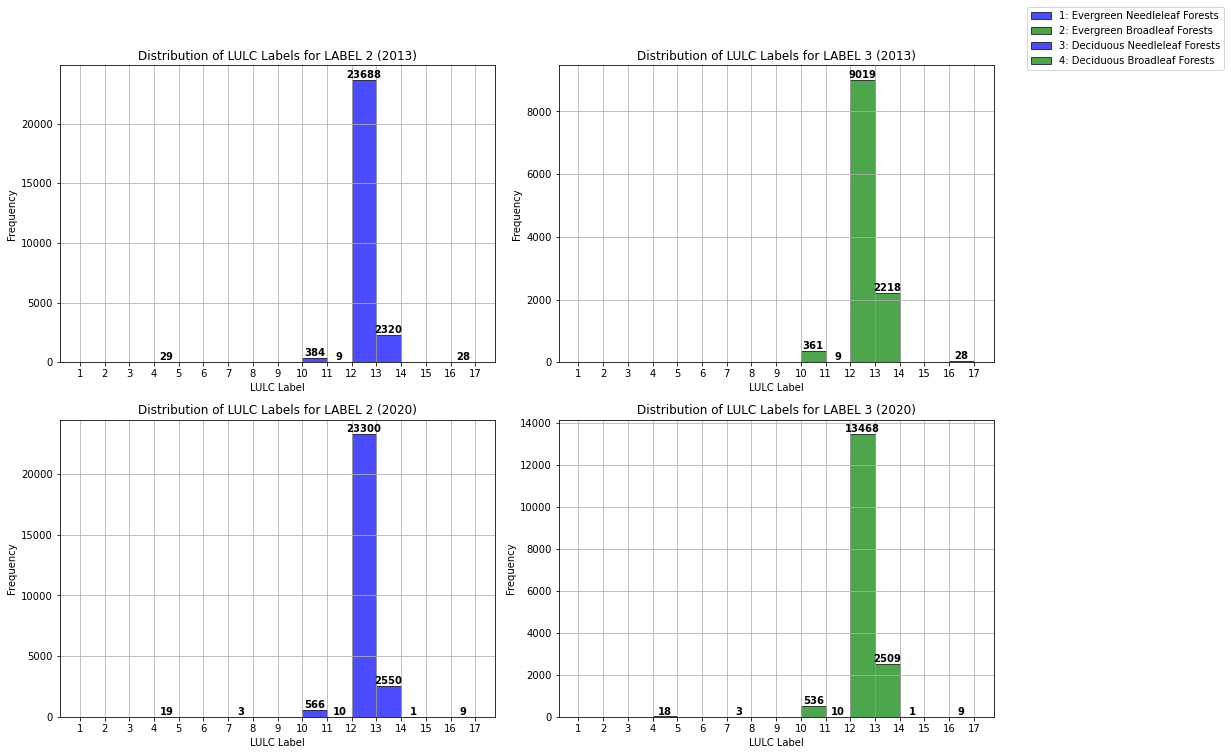

In [31]:
def add_bar_labels(ax):
    for p in ax.patches:
        if p.get_height() > 0:
            value = int(p.get_height())  # Convert the value to an integer
            ax.annotate(f"{value}", (p.get_x() + p.get_width() / 2., p.get_height() + 0.1), ha='center', va='bottom', fontsize=10, color='black', weight='bold')
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Subplot 1: LABEL 2 in predictions_2013_df
lulc_label_2 = lulc[lulc['LAT'].isin(label_2_points['LAT']) & lulc['LON'].isin(label_2_points['LON'])]
axs[0, 0].hist(lulc_label_2['2013'], bins=range(1, 18), alpha=0.7, color='blue', edgecolor='black')
axs[0, 0].set_title('Distribution of LULC Labels for LABEL 2 (2013)')
axs[0, 0].set_xlabel('LULC Label')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(True)
axs[0, 0].set_xticks(range(1, 18))
add_bar_labels(axs[0, 0])

# Subplot 2: LABEL 3 in predictions_2013_df
lulc_label_3 = lulc[lulc['LAT'].isin(label_3_points['LAT']) & lulc['LON'].isin(label_3_points['LON'])]
axs[0, 1].hist(lulc_label_3['2013'], bins=range(1, 18), alpha=0.7, color='green', edgecolor='black')
axs[0, 1].set_title('Distribution of LULC Labels for LABEL 3 (2013)')
axs[0, 1].set_xlabel('LULC Label')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)
axs[0, 1].set_xticks(range(1, 18))
add_bar_labels(axs[0, 1])

# Subplot 3: LABEL 2 in predictions_2020_df
lulc_label_2_2020 = lulc[lulc['LAT'].isin(predictions_2020_df[predictions_2020_df['LABEL'] == 2]['LAT']) & lulc['LON'].isin(predictions_2020_df[predictions_2020_df['LABEL'] == 2]['LON'])]
axs[1, 0].hist(lulc_label_2_2020['2020'], bins=range(1, 18), alpha=0.7, color='blue', edgecolor='black')
axs[1, 0].set_title('Distribution of LULC Labels for LABEL 2 (2020)')
axs[1, 0].set_xlabel('LULC Label')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)
axs[1, 0].set_xticks(range(1, 18))
add_bar_labels(axs[1, 0])

# Subplot 4: LABEL 3 in predictions_2020_df
lulc_label_3_2020 = lulc[lulc['LAT'].isin(predictions_2020_df[predictions_2020_df['LABEL'] == 3]['LAT']) & lulc['LON'].isin(predictions_2020_df[predictions_2020_df['LABEL'] == 3]['LON'])]
axs[1, 1].hist(lulc_label_3_2020['2020'], bins=range(1, 18), alpha=0.7, color='green', edgecolor='black')
axs[1, 1].set_title('Distribution of LULC Labels for LABEL 3 (2020)')
axs[1, 1].set_xlabel('LULC Label')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)
axs[1, 1].set_xticks(range(1, 18))
add_bar_labels(axs[1, 1])

# Adjust layout
plt.tight_layout()

# Create a legend
legend_labels = [
    "1: Evergreen Needleleaf Forests", "2: Evergreen Broadleaf Forests", "3: Deciduous Needleleaf Forests",
    "4: Deciduous Broadleaf Forests", "5: Mixed Forests", "6: Closed Shrublands", "7: Open Shrublands",
    "8: Woody Savannas", "9: Savannas", "10: Grasslands", "11: Permanent Wetlands", "12: Croplands",
    "13: Urban and Built-up Lands", "14: Cropland/Natural Vegetation Mosaics",
    "15: Permanent Snow and Ice", "16: Barren", "17: Water Bodies"
]

fig.legend(legend_labels, loc='center', bbox_to_anchor=(1.12, 1), ncol=1)  # Set ncol to 1

# Show the plot
plt.show()

In [40]:
matched_rows = []

# Iterate through predictions_2020_df
for index, row in predictions_2020_df.iterrows():
    lat = row['LAT']
    lon = row['LON']
    label = row['LABEL']
    
    # Find matching rows in lulc dataframe
    matching_rows = lulc[(lulc['LAT'] == lat) & (lulc['LON'] == lon)]
    
    # Iterate through matching rows and store in the list
    for _, match_row in matching_rows.iterrows():
        matched_rows.append({
            'LAT': lat,
            'LON': lon,
            'LABEL': label,
            '2020': match_row['2020']
        })

# Create a new dataframe from the matched_rows list
result_2020 = pd.DataFrame(matched_rows)


In [39]:
matched_rows = []


for index, row in predictions_2013_df.iterrows():
    lat = row['LAT']
    lon = row['LON']
    label = row['LABEL']
    
    # Find matching rows in lulc dataframe
    matching_rows = lulc[(lulc['LAT'] == lat) & (lulc['LON'] == lon)]
    
    # Iterate through matching rows and store in the list
    for _, match_row in matching_rows.iterrows():
        matched_rows.append({
            'LAT': lat,
            'LON': lon,
            'LABEL': label,
            '2013': match_row['2013']
        })

# Create a new dataframe from the matched_rows list
result_2013 = pd.DataFrame(matched_rows)

/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


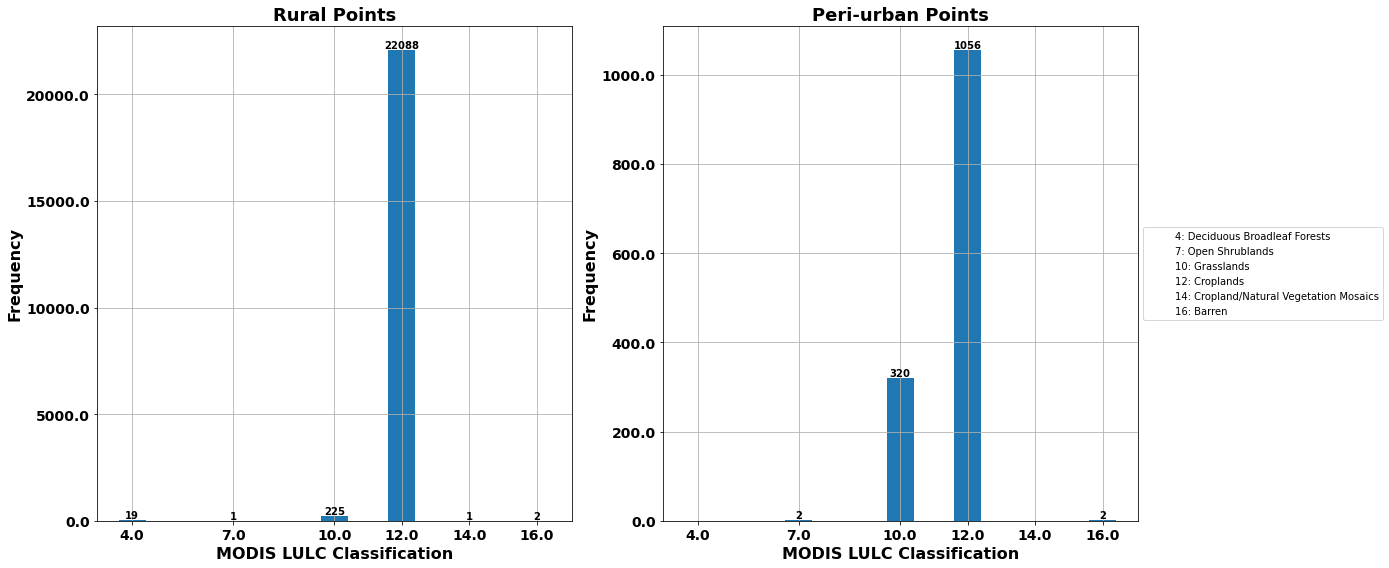

In [81]:

grouped = result_2020.groupby('LABEL')

# Get unique values from the '2020' column for the x-axis
unique_values_2020 = sorted(result_2020['2020'].unique())

# Calculate the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(grouped) + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))

# Flatten axs if it's a 1D array
if n_rows == 1:
    axs = [axs]

# Legend labels with only values present on x-axis
legend_labels_2020 = [
    "4: Deciduous Broadleaf Forests", "7: Open Shrublands", "10: Grasslands", "12: Croplands", "14: Cropland/Natural Vegetation Mosaics",  "16: Barren"
]  # Add more labels as needed for the specific x-axis values

for (label, group), ax in zip(grouped, axs[0]):
    group_counts_2020 = group['2020'].value_counts().reindex(unique_values_2020, fill_value=0)
    ax.bar(group_counts_2020.index, group_counts_2020.values)
    if label == 2:
        ax.set_title('Rural Points', weight='bold', fontsize=18)
    elif label == 3:
        ax.set_title('Peri-urban Points', weight='bold', fontsize=18)
    ax.set_xlabel('MODIS LULC Classification', weight='bold', fontsize=16)
    ax.set_ylabel('Frequency', weight='bold', fontsize=16)
    ax.set_xticks(unique_values_2020)
    ax.set_xticklabels(unique_values_2020, fontsize=14, weight='bold')
    ax.set_yticklabels(ax.get_yticks(), fontsize=14, weight='bold')
    ax.grid(True)
    
    # Add labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Adjust layout
plt.tight_layout()

# Create a custom legend
custom_legend_2020 = [plt.Line2D([0], [0], marker='s', color='w', label=label) for label in legend_labels_2020]
plt.legend(handles=custom_legend_2020, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
output_filename = "2020_lulc_comp.eps"
plt.savefig(output_filename, format='eps', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


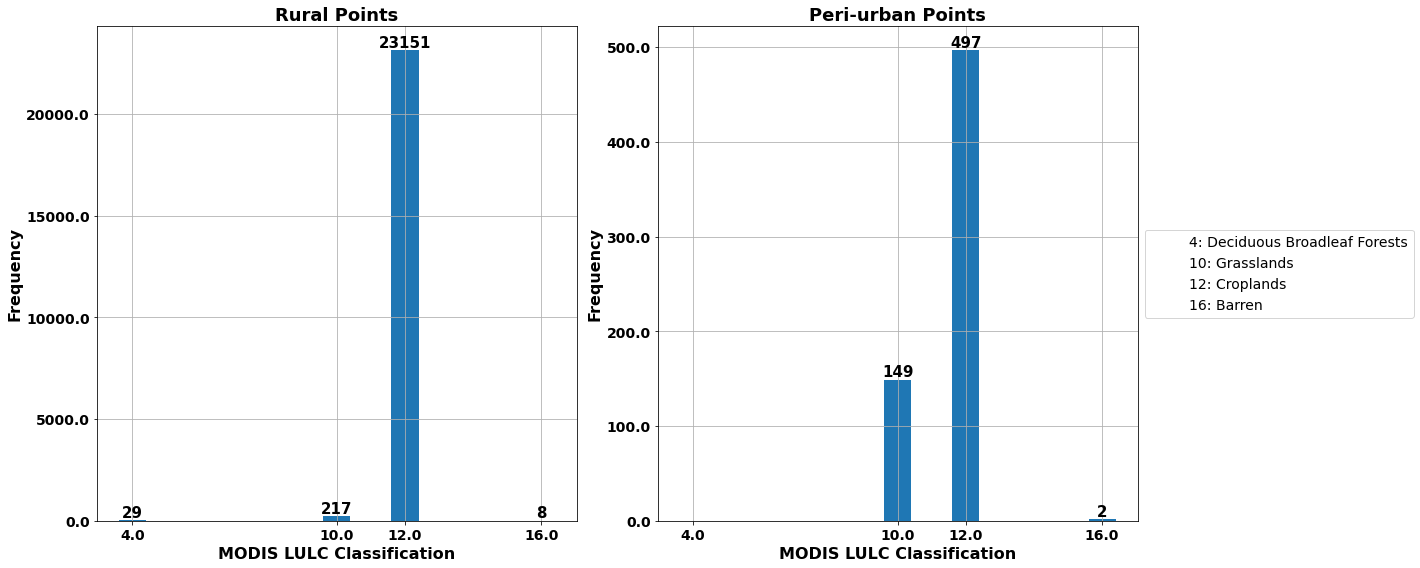

In [79]:
grouped = result_2013.groupby('LABEL')

# Get unique values from the 2013 column for the x-axis
unique_values = sorted(result_2013['2013'].unique())

# Calculate the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(grouped) + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))

# Flatten axs if it's a 1D array
if n_rows == 1:
    axs = [axs]

# Legend labels with only values present on x-axis
legend_labels = [
    "4: Deciduous Broadleaf Forests", "10: Grasslands", "12: Croplands", "16: Barren"
]  # Add more labels as needed for the specific x-axis values

for (label, group), ax in zip(grouped, axs[0]):
    group_counts = group['2013'].value_counts().reindex(unique_values, fill_value=0)
    ax.bar(group_counts.index, group_counts.values)
    if label == 2:
        ax.set_title('Rural Points', weight='bold', fontsize=18)
    elif label == 3:
        ax.set_title('Peri-urban Points', weight='bold', fontsize=18)
    ax.set_xlabel('MODIS LULC Classification', weight='bold', fontsize=16)
    ax.set_ylabel('Frequency', weight='bold', fontsize=16)
    ax.set_xticks(unique_values)
    ax.set_xticklabels(unique_values, fontsize=14, weight='bold')  # Increase xtick fontsize and make it bold
    ax.set_yticklabels(ax.get_yticks(), fontsize=14, weight='bold')  # Increase ytick fontsize and make it bold
    ax.grid(True)
    
    # Add labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=15, color='black', weight='bold')

# Adjust layout
plt.tight_layout()

# Create a custom legend
custom_legend = [plt.Line2D([0], [0], marker='s', color='w', label=label, linestyle='', markersize=10) for label in legend_labels]
plt.legend(handles=custom_legend, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

output_filename = "2013_lulc_comp.eps"
plt.savefig(output_filename, format='eps', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()

/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


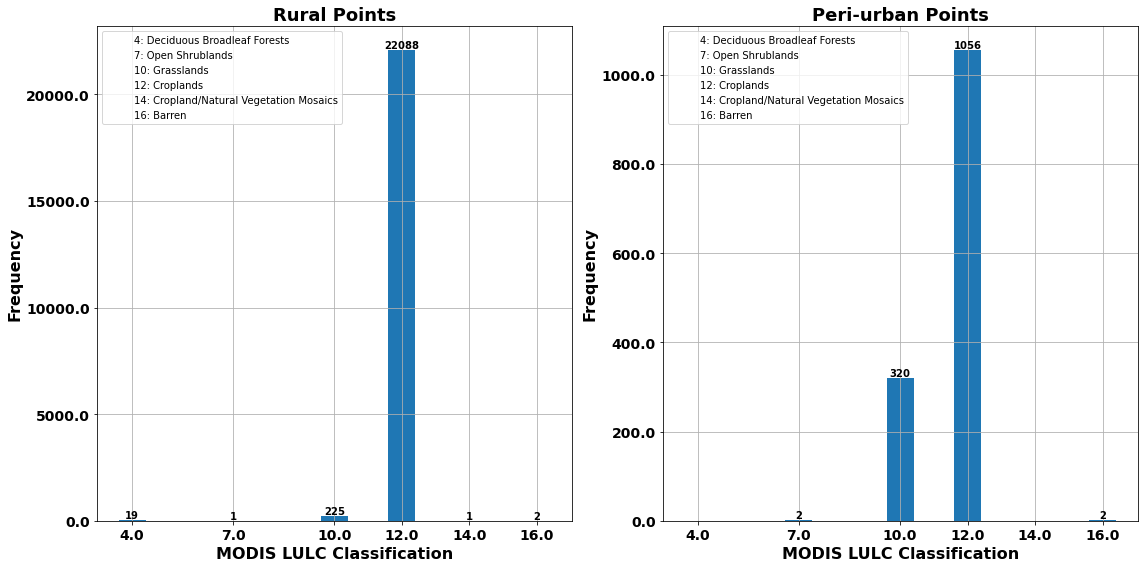

In [85]:
import matplotlib.pyplot as plt

# ... (previous code remains the same)

grouped = result_2020.groupby('LABEL')

# Get unique values from the '2020' column for the x-axis
unique_values_2020 = sorted(result_2020['2020'].unique())

# Calculate the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(grouped) + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))

# Flatten axs if it's a 1D array
if n_rows == 1:
    axs = [axs]

# Legend labels with only values present on x-axis
legend_labels_2020 = [
    "4: Deciduous Broadleaf Forests", "7: Open Shrublands", "10: Grasslands", "12: Croplands", "14: Cropland/Natural Vegetation Mosaics",  "16: Barren"
]  # Add more labels as needed for the specific x-axis values

for (label, group), ax in zip(grouped, axs[0]):
    group_counts_2020 = group['2020'].value_counts().reindex(unique_values_2020, fill_value=0)
    ax.bar(group_counts_2020.index, group_counts_2020.values)
    if label == 2:
        ax.set_title('Rural Points', weight='bold', fontsize=18)
    elif label == 3:
        ax.set_title('Peri-urban Points', weight='bold', fontsize=18)
    ax.set_xlabel('MODIS LULC Classification', weight='bold', fontsize=16)
    ax.set_ylabel('Frequency', weight='bold', fontsize=16)
    ax.set_xticks(unique_values_2020)
    ax.set_xticklabels(unique_values_2020, fontsize=14, weight='bold')
    ax.set_yticklabels(ax.get_yticks(), fontsize=14, weight='bold')
    ax.grid(True)
    
    # Add labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black', weight='bold')
    
    # Add legend to the subplot
    custom_legend_subplot = [plt.Line2D([0], [0], marker='s', color='w', label=label) for label in legend_labels_2020]
    ax.legend(handles=custom_legend_subplot, loc='upper left', fontsize=10)

# Adjust layout
plt.tight_layout()

output_filename = "2020_lulc_comp.eps"
plt.savefig(output_filename, format='eps', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


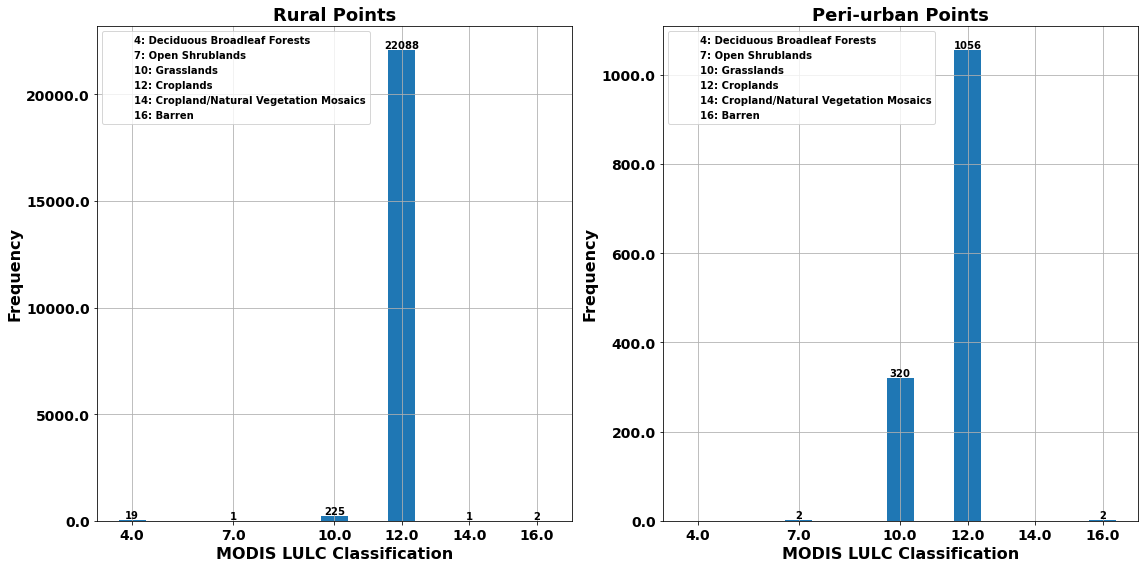

In [86]:
import matplotlib.pyplot as plt

# ... (previous code remains the same)

grouped = result_2020.groupby('LABEL')

# Get unique values from the '2020' column for the x-axis
unique_values_2020 = sorted(result_2020['2020'].unique())

# Calculate the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(grouped) + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))

# Flatten axs if it's a 1D array
if n_rows == 1:
    axs = [axs]

# Legend labels with only values present on x-axis
legend_labels_2020 = [
    "4: Deciduous Broadleaf Forests", "7: Open Shrublands", "10: Grasslands", "12: Croplands", "14: Cropland/Natural Vegetation Mosaics",  "16: Barren"
]  # Add more labels as needed for the specific x-axis values

for (label, group), ax in zip(grouped, axs[0]):
    group_counts_2020 = group['2020'].value_counts().reindex(unique_values_2020, fill_value=0)
    ax.bar(group_counts_2020.index, group_counts_2020.values)
    if label == 2:
        ax.set_title('Rural Points', weight='bold', fontsize=18)
    elif label == 3:
        ax.set_title('Peri-urban Points', weight='bold', fontsize=18)
    ax.set_xlabel('MODIS LULC Classification', weight='bold', fontsize=16)
    ax.set_ylabel('Frequency', weight='bold', fontsize=16)
    ax.set_xticks(unique_values_2020)
    ax.set_xticklabels(unique_values_2020, fontsize=14, weight='bold')
    ax.set_yticklabels(ax.get_yticks(), fontsize=14, weight='bold')
    ax.grid(True)
    
    # Add labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black', weight='bold')
    
    # Add legend to the subplot
    custom_legend_subplot = [plt.Line2D([0], [0], marker='s', color='w', label=label) for label in legend_labels_2020]
    ax.legend(handles=custom_legend_subplot, loc='upper left', fontsize=10, prop={'weight': 'bold'})  # Add prop parameter to make legend font bold

# Adjust layout
plt.tight_layout()

output_filename = "2020_lulc_comp.eps"
plt.savefig(output_filename, format='eps', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


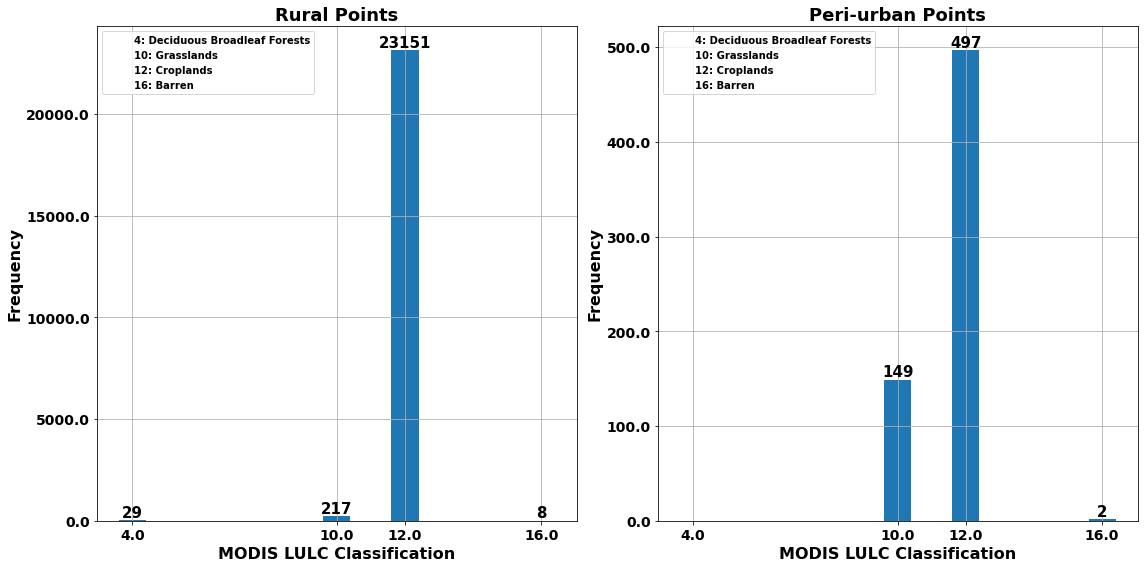

In [87]:
import matplotlib.pyplot as plt

# ... (previous code remains the same)

grouped = result_2013.groupby('LABEL')

# Get unique values from the 2013 column for the x-axis
unique_values = sorted(result_2013['2013'].unique())

# Calculate the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(grouped) + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))

# Flatten axs if it's a 1D array
if n_rows == 1:
    axs = [axs]

# Legend labels with only values present on x-axis
legend_labels = [
    "4: Deciduous Broadleaf Forests", "10: Grasslands", "12: Croplands", "16: Barren"
]  # Add more labels as needed for the specific x-axis values

for (label, group), ax in zip(grouped, axs[0]):
    group_counts = group['2013'].value_counts().reindex(unique_values, fill_value=0)
    ax.bar(group_counts.index, group_counts.values)
    if label == 2:
        ax.set_title('Rural Points', weight='bold', fontsize=18)
    elif label == 3:
        ax.set_title('Peri-urban Points', weight='bold', fontsize=18)
    ax.set_xlabel('MODIS LULC Classification', weight='bold', fontsize=16)
    ax.set_ylabel('Frequency', weight='bold', fontsize=16)
    ax.set_xticks(unique_values)
    ax.set_xticklabels(unique_values, fontsize=14, weight='bold')
    ax.set_yticklabels(ax.get_yticks(), fontsize=14, weight='bold')
    ax.grid(True)
    
    # Add labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=15, color='black', weight='bold')
    
    # Add legend to the subplot
    custom_legend_subplot = [plt.Line2D([0], [0], marker='s', color='w', label=label) for label in legend_labels]
    ax.legend(handles=custom_legend_subplot, loc='upper left', fontsize=10, prop={'weight': 'bold'})  # Add prop parameter to make legend font bold

# Adjust layout
plt.tight_layout()

output_filename = "2013_lulc_comp.eps"
plt.savefig(output_filename, format='eps', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()
